In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [54]:
df = pd.read_csv('Algerian forest fire_cleaned.csv')

In [55]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [35]:
#df = df.drop(['day', 'month', 'year'], axis=1)

In [56]:
df['Classes'] = df['Classes'].replace({'not fire':0, 'fire':1})

In [57]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [58]:
x = df.drop(columns=['Temperature'])
y = df.Temperature

In [39]:
x.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [212]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

### Target column distribution

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

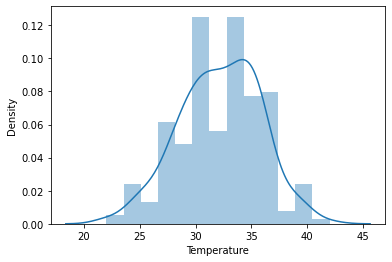

In [8]:
sns.distplot(y)

### Feature column correlation (multicolinearity)

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst x1,x2,x3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the other independent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="cor.PNG" width="300">
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.preprocessing import StandardScaler

def vif_score(df):
    #scaler = StandardScaler()
    #df_arr = scaler.fit_transform(df)
    df_vif = pd.DataFrame()
    df_vif['Feature'] = df.columns
    # we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
    df_vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    #df_vif['VIF'] = [variance_inflation_factor(df_arr,i) for i in range(df_arr.shape[1])]
    return df_vif

In [9]:
vif_score(x)

,Feature,VIF
0,day,1.464684
1,month,1.064093
2,year,326.831945
3,RH,3.021835
4,Ws,1.253228
5,Rain,1.574032
6,FFMC,5.326155
7,DMC,85.326614
8,DC,25.385123
9,ISI,23.421754


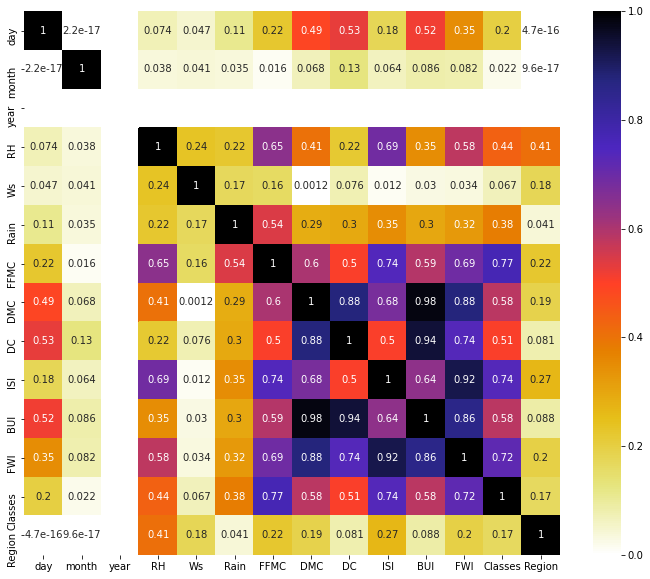

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# Absolute values of Correlation matrix
corr_df = x.corr().abs()
# output array of True(dtype=bool) with the same shape as `corr_df`
bool_arr = np.ones_like(corr_df, dtype=bool)
# Upper triangle of an array
mask = np.triu(bool_arr)
# Mask method
tri_df = corr_df.mask(mask)
# find columns that exceed threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.85)]
print(to_drop)

['DMC', 'DC', 'ISI', 'BUI']


In [59]:
def get_correlated_cols(data, threshold):
    corr_col1 = set()      # creating a set of all unique columns
    corr_col2 = set()
    corr_df = data.corr().abs()          # correlation matrix containing absolute values
    for i in range(len(corr_df.columns)):
        for j in range(i):
            if corr_df.iloc[i,j] > threshold:
                # we can drop either one of the correlated columns, we can use either corr_df.columns[i] or corr_df.columns[j]
                col_name1 = corr_df.columns[j]     # getting the column name
                col_name2 = corr_df.columns[i]
                corr_col1.add(col_name1)
                corr_col2.add(col_name2)
    return corr_col1, corr_col2

In [60]:
corr_cols = get_correlated_cols(x, 0.9)
corr_cols

({'DC', 'DMC', 'ISI'}, {'BUI', 'FWI'})

#### Dropping highly correlated features

In [61]:
#x.drop(corr_cols[0], axis=1, inplace=True)
x.drop(corr_cols[1], axis=1, inplace=True)
x.shape

(244, 12)

In [15]:
# vif score after dropping hihgly correlated features
vif_score(x)

,Feature,VIF
0,day,1.415957
1,month,1.016800
2,year,316.699028
3,RH,3.002204
4,Ws,1.225305
5,Rain,1.543059
6,FFMC,4.656566
7,DMC,2.668093
8,ISI,4.754323
9,Classes,3.345217


In [62]:
x = x.drop(['year'], axis=1)
x.shape

(244, 11)

<AxesSubplot:>

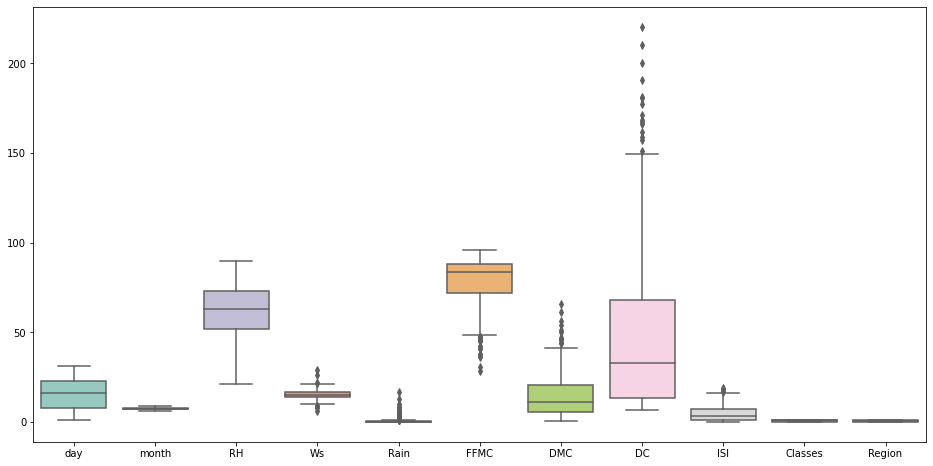

In [63]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=x, palette='Set3')

In [42]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        #print(i, z_score)
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for feature in x.columns:
    sample_outliers = detect_outliers_zscore(x[feature])
    print(f"Outliers from Z-scores method for {feature} are {sample_outliers}")

Outliers from Z-scores method for day are []
Outliers from Z-scores method for month are []
Outliers from Z-scores method for RH are []
Outliers from Z-scores method for Ws are [26, 6, 29]
Outliers from Z-scores method for Rain are [13.1, 16.8, 7.2, 10.1, 8.3, 8.7]
Outliers from Z-scores method for FFMC are [28.6, 30.5]
Outliers from Z-scores method for DMC are [54.2, 56.3, 61.3, 65.9]
Outliers from Z-scores method for DC are [200.2, 210.4, 220.4]
Outliers from Z-scores method for ISI are [18.5, 17.2, 19.0]
Outliers from Z-scores method for Classes are []
Outliers from Z-scores method for Region are []


In [43]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for col in x.columns:
    sample_outliers = detect_outliers_iqr(x[col])
    print(f"Outliers from IQR method for {col} are {sample_outliers}")

Outliers from IQR method for day are []
Outliers from IQR method for month are []
Outliers from IQR method for RH are []
Outliers from IQR method for Ws are [6, 8, 9, 9, 22, 22, 26, 29]
Outliers from IQR method for Rain are [1.3, 1.3, 1.4, 1.4, 1.7, 1.8, 1.8, 1.8, 1.9, 2.0, 2.0, 2.0, 2.2, 2.5, 2.9, 2.9, 3.1, 3.1, 3.8, 3.8, 4.0, 4.1, 4.4, 4.5, 4.6, 4.7, 5.8, 6.0, 6.5, 7.2, 8.3, 8.7, 10.1, 13.1, 16.8]
Outliers from IQR method for FFMC are [28.6, 30.5, 36.1, 37.3, 37.9, 40.9, 41.1, 42.6, 44.9, 45.0, 45.9, 46.0, 47.1, 47.4, 47.4, 47.4]
Outliers from IQR method for DMC are [43.9, 44.2, 45.6, 46.1, 46.6, 47.0, 50.2, 51.3, 54.2, 56.3, 61.3, 65.9]
Outliers from IQR method for DC are [151.3, 157.5, 159.1, 161.5, 166.0, 167.2, 168.2, 171.3, 177.3, 180.4, 181.3, 190.6, 200.2, 210.4, 220.4]
Outliers from IQR method for ISI are [16.6, 17.2, 18.5, 19.0]
Outliers from IQR method for Classes are []
Outliers from IQR method for Region are []


In [44]:
x.shape

(244, 11)

### Quantile-based Flooring and Capping

In this technique, we will do the flooring (e.g., the 25th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.

In [183]:
for col in x:
    q_1 = x[col].quantile(0.25)
    q_3 = x[col].quantile(0.75)
    iq_range = q_3 - q_1
    lwr_fence = q_1 - (1.5*iq_range)
    upr_fence = q_3 + (1.5*iq_range)
    
    print(f"Lower and upper fence for {col} is {lwr_fence} and {upr_fence} respectively.")
    #print('\n')
    
    x[col] = np.where(x[col] < lwr_fence, lwr_fence, x[col])
    x[col] = np.where(x[col] > upr_fence, upr_fence, x[col])

print("New Shape after flooring and capping outliers: ", x.shape)

Lower and upper fence for day is -14.5 and 45.5 respectively.
Lower and upper fence for month is 5.5 and 9.5 respectively.
Lower and upper fence for RH is 20.125 and 105.125 respectively.
Lower and upper fence for Ws is 9.5 and 21.5 respectively.
Lower and upper fence for Rain is -0.75 and 1.25 respectively.
Lower and upper fence for FFMC is 47.73750000000001 and 112.63749999999999 respectively.
Lower and upper fence for DMC is -16.624999999999996 and 43.175 respectively.
Lower and upper fence for DC is -69.03750000000002 and 150.46250000000003 respectively.
Lower and upper fence for ISI is -7.450000000000001 and 16.150000000000002 respectively.
Lower and upper fence for Classes is -1.5 and 2.5 respectively.
Lower and upper fence for Region is -1.5 and 2.5 respectively.
New Shape after flooring and capping outliers:  (244, 11)


<AxesSubplot:>

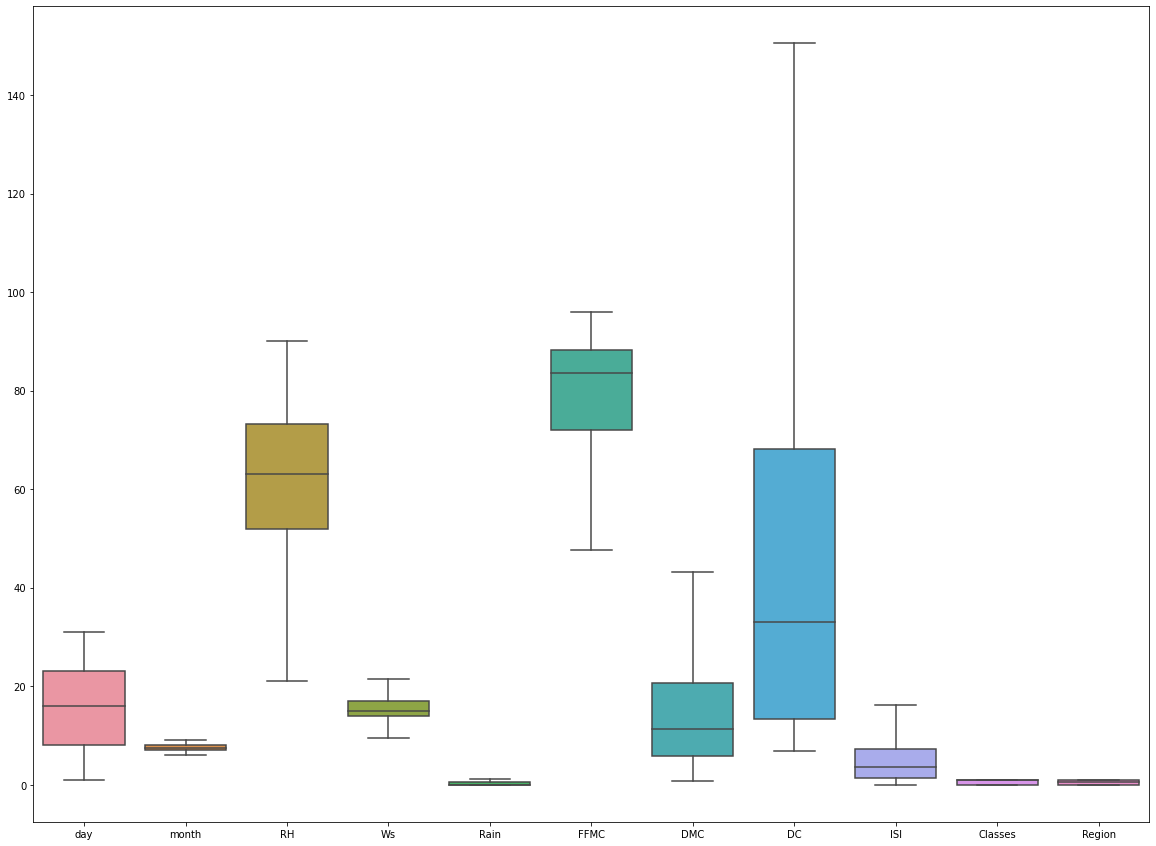

In [184]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data = x, ax = ax)

## SKIP

### Transforming feature columns to make them normal distributed

In [185]:
import scipy.stats as stats
import pylab

def qq_plot(df, feature):
    plt.figure(figsize=(12,4))
    plt.suptitle(feature, fontsize=20, fontweight = 'bold', alpha=0.8, y=1.)
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], plot=pylab)
    plt.show()

In [94]:
df_copy= df.copy()

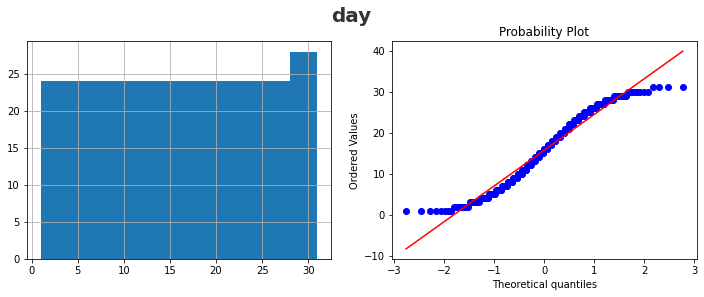

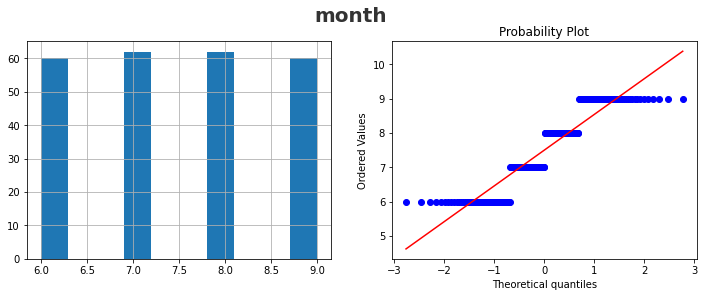

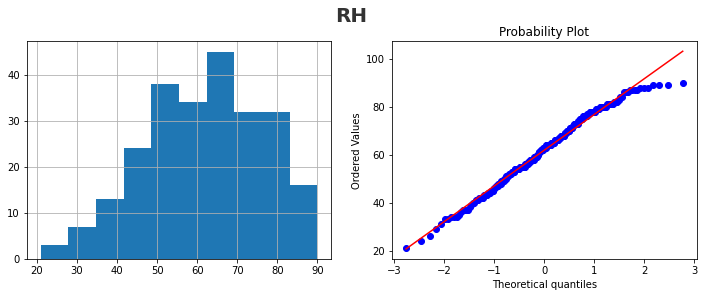

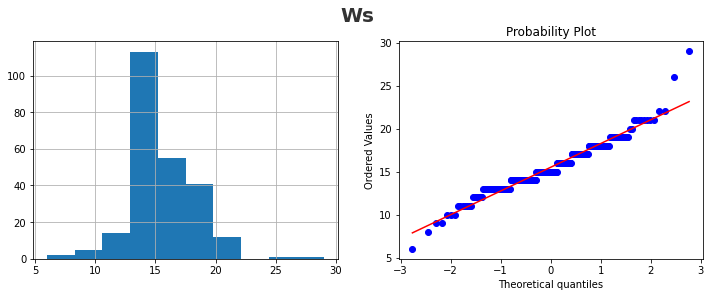

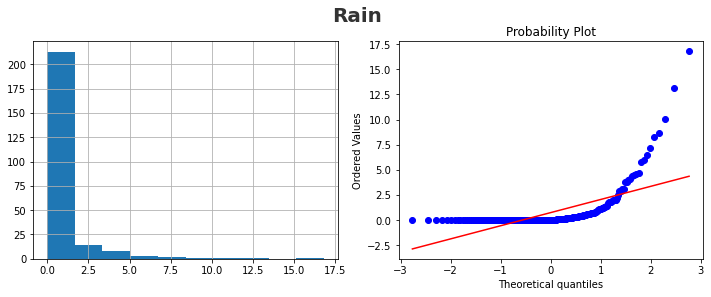

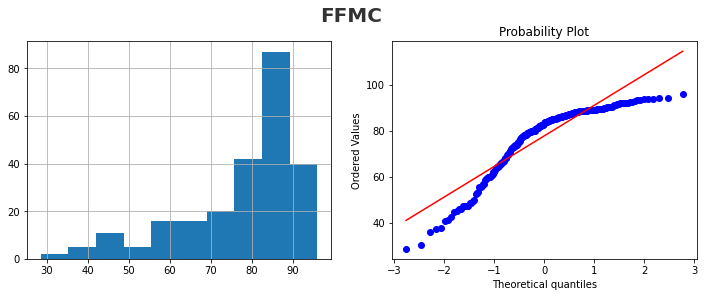

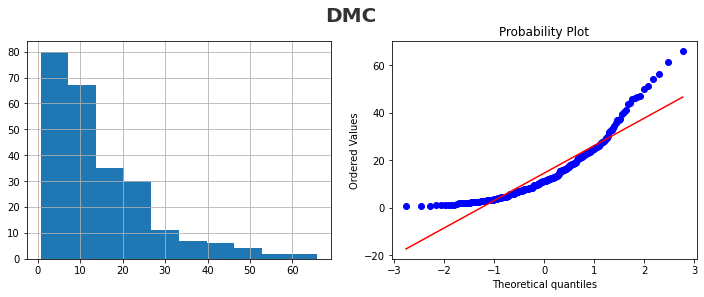

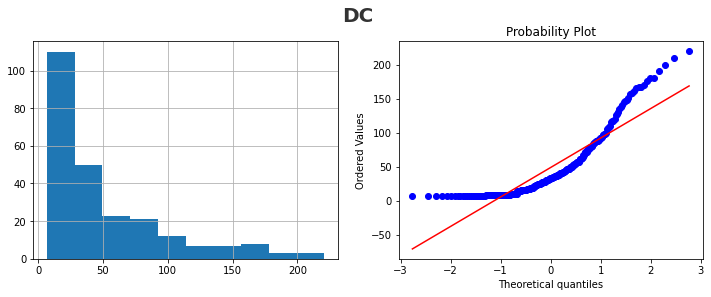

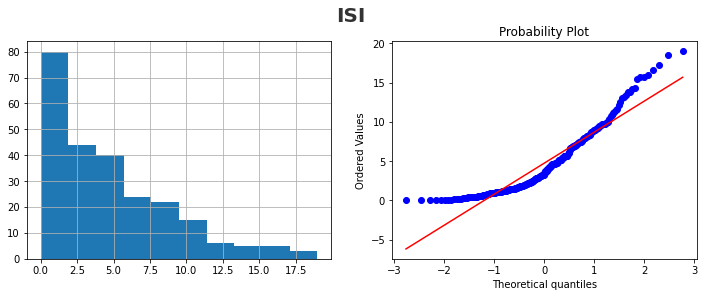

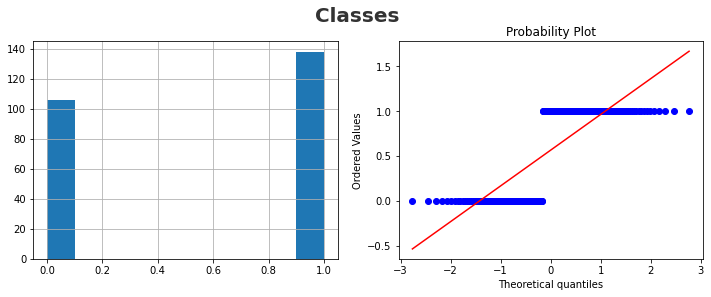

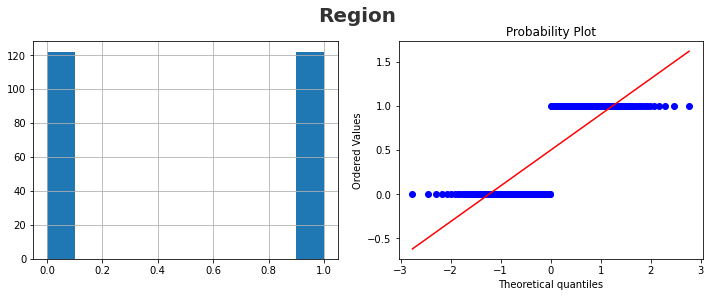

In [186]:
for i in range(len(x.columns)):
    ax = qq_plot(df, x.columns[i])

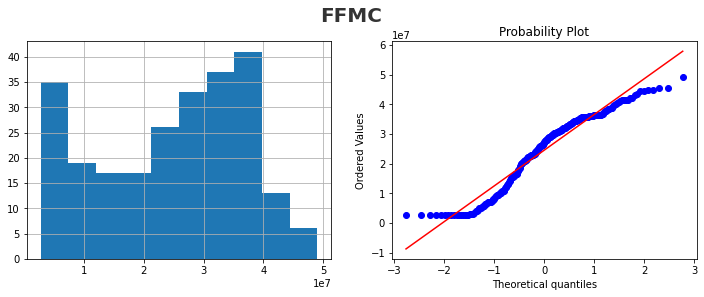

Lambda value used for transformation of FFMC is 4.183723176288671


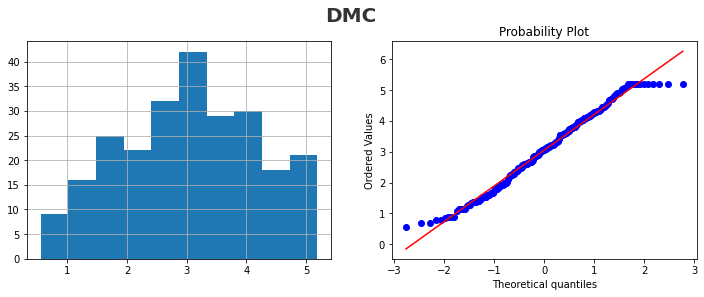

Lambda value used for transformation of DMC is 0.15865541739573052


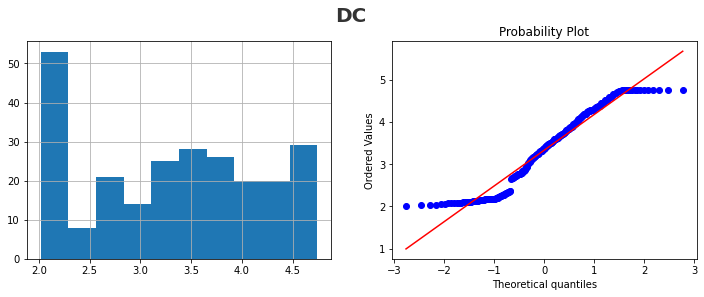

Lambda value used for transformation of DC is -0.022837703044234034


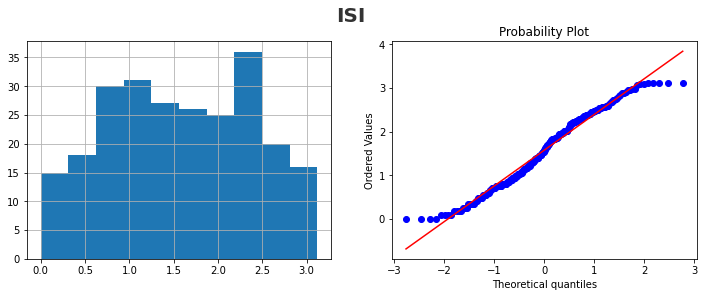

Lambda value used for transformation of ISI is 0.06515159984985047


In [187]:
## Box-cox transformation
col_transform = ['FFMC','DC','DMC','ISI']
for i in range(len(x.columns)):
    if x.columns[i] in col_transform:
        x[x.columns[i]], params = stats.boxcox(x[x.columns[i]]+1)
        qq_plot(x, x.columns[i])
        print(f"Lambda value used for transformation of {x.columns[i]} is {params}")

In [188]:
x

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1.0,6.0,57.0,18.0,0.00,1.023469e+07,1.670226,2.099748,0.855923,0.0,0.0
1,2.0,6.0,61.0,13.0,1.25,9.425660e+06,1.859189,2.099748,0.709037,0.0,0.0
2,3.0,6.0,82.0,21.5,1.25,2.754163e+06,1.385936,2.042683,0.264619,0.0,0.0
3,4.0,6.0,89.0,13.0,1.25,2.754163e+06,0.890448,2.018841,0.000000,0.0,0.0
4,5.0,6.0,77.0,16.0,0.00,9.669207e+06,1.550567,2.638459,0.809060,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,65.0,14.0,0.00,3.021861e+07,3.577158,3.656017,1.803023,1.0,1.0
240,27.0,9.0,87.0,15.0,1.25,2.754163e+06,2.374206,2.143007,0.095607,0.0,1.0
241,28.0,9.0,87.0,21.5,0.50,2.754163e+06,1.698705,2.132380,0.340187,0.0,1.0
242,29.0,9.0,54.0,18.0,0.10,2.271266e+07,1.909154,2.698292,1.026094,0.0,1.0


## RESUME

In [64]:
# dropping columns which may not help in regression model
#x.drop(columns=['day','month'], inplace=True)   # keeping cols Classes and Region doesn't improve our R2 score
x.drop(columns=['day','month','Classes','Region'], inplace=True)
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,57,18,0.0,65.7,3.4,7.6,1.3
1,61,13,1.3,64.4,4.1,7.6,1.0
2,82,22,13.1,47.1,2.5,7.1,0.3
3,89,13,2.5,28.6,1.3,6.9,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2
...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5
240,87,15,4.4,41.1,6.5,8.0,0.1
241,87,29,0.5,45.9,3.5,7.9,0.4
242,54,18,0.1,79.7,4.3,15.2,1.7


In [249]:
# target column is Temperature
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

### Train test split

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [106]:
x_train.shape, x_test.shape

((183, 7), (61, 7))

In [107]:
y_train.shape, y_test.shape

((183,), (61,))

In [108]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI
136,90,15,0.0,66.8,7.2,14.7,1.2
225,72,14,0.0,84.2,8.3,25.2,3.8
209,54,14,0.0,91.0,65.9,177.3,10.0
241,87,29,0.5,45.9,3.5,7.9,0.4
120,80,16,1.8,47.4,2.9,7.7,0.3
...,...,...,...,...,...,...,...
71,63,13,0.0,88.9,21.7,77.0,7.1
75,55,13,0.3,82.4,15.6,92.5,3.7
176,64,9,1.2,73.8,11.7,15.9,1.1
234,34,17,0.0,92.2,23.6,97.3,13.8


In [74]:
y_train

203    36
220    31
151    34
54     31
51     28
       ..
100    30
192    39
44     30
132    31
117    31
Name: Temperature, Length: 183, dtype: int64

### Standardization

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
# we get ndarray after fit_transform method of scaler class, we convert this array to dataframe
df_xtrain_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = std_scaler.transform(x_test)
# make a copy for plotting purpose only
df_xtrain_scaled_toplot = df_xtrain_scaled.copy()

Text(0.5, 1.0, 'x_train after scaling')

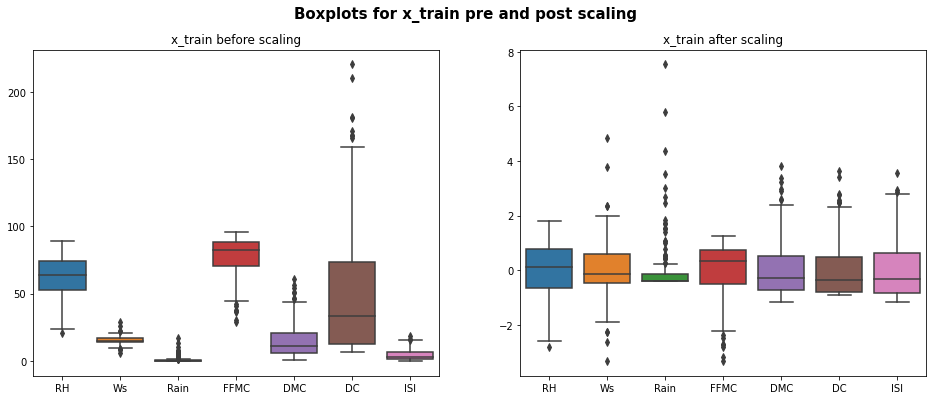

In [101]:
plt.figure(figsize=(16,6))
plt.suptitle("Boxplots for x_train pre and post scaling", fontsize = 15, fontweight='bold')

plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=df_xtrain_scaled_toplot)
plt.title('x_train after scaling')

### Detecting and handling outliers

In [107]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        #print(i, z_score)
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for feature in df_xtrain_scaled.columns:
    sample_outliers = detect_outliers_zscore(df_xtrain_scaled[feature])
    print(f"Outliers from Z-scores method for {feature} are {sample_outliers}")

Outliers from Z-scores method for RH are []
Outliers from Z-scores method for Ws are [4.739031462049836, -3.3496073959257364, 3.6839916110095445]
Outliers from Z-scores method for Rain are [7.894097663373159, 3.158447748736326, 3.898393047898331, 3.7010743014551304, 4.589008660449537]
Outliers from Z-scores method for FFMC are []
Outliers from Z-scores method for FWI are []
Outliers from Z-scores method for Classes are []
Outliers from Z-scores method for Region are []


In [108]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for col in df_xtrain_scaled.columns:
    sample_outliers = detect_outliers_iqr(df_xtrain_scaled[col])
    print(f"Outliers from IQR method for {col} are {sample_outliers}")

Outliers from IQR method for RH are []
Outliers from IQR method for Ws are [-3.3496073959257364, -2.6462474952322084, -2.294567544885444, 2.277271809622488, 3.6839916110095445, 4.739031462049836]
Outliers from IQR method for Rain are [0.29732592530990587, 0.29732592530990587, 0.44531498514230694, 0.4946446717531074, 0.4946446717531074, 0.4946446717531074, 0.5439743583639076, 0.593304044974708, 0.593304044974708, 0.593304044974708, 0.6919634181963088, 1.0372712244719111, 1.135930597693512, 1.135930597693512, 1.4812384039691142, 1.579897777190715, 1.7772165236339166, 1.875875896855517, 1.9252055834663175, 2.467832136185121, 2.5664915094067218, 2.8131399424607237, 3.158447748736326, 3.7010743014551304, 3.898393047898331, 4.589008660449537, 7.894097663373159]
Outliers from IQR method for FFMC are []
Outliers from IQR method for FWI are []
Outliers from IQR method for Classes are []
Outliers from IQR method for Region are []


### Quantile-based Flooring and Capping

In this technique, we will do the flooring (e.g., the 25th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.

In [109]:
for col in df_xtrain_scaled:
    q_1 = np.percentile(df_xtrain_scaled[col], 25, interpolation = 'midpoint')
    q_3 = np.percentile(df_xtrain_scaled[col], 75, interpolation = 'midpoint')
    #q_1 = df_xtrain_scaled.quantile(0.25)
    #q_3 = df_xtrain_scaled.quantile(0.75)
    iq_range = q_3 - q_1
    lwr_fence = q_1 - (1.5*iq_range)
    upr_fence = q_3 + (1.5*iq_range)
    
    df_xtrain_scaled[col] = np.where(df_xtrain_scaled[col] < lwr_fence, lwr_fence,df_xtrain_scaled[col])
    df_xtrain_scaled[col] = np.where(df_xtrain_scaled[col] > upr_fence, upr_fence,df_xtrain_scaled[col])

print("New Shape after flooring and capping outliers: ", df_xtrain_scaled.shape)

New Shape after flooring and capping outliers:  (183, 7)


<AxesSubplot:>

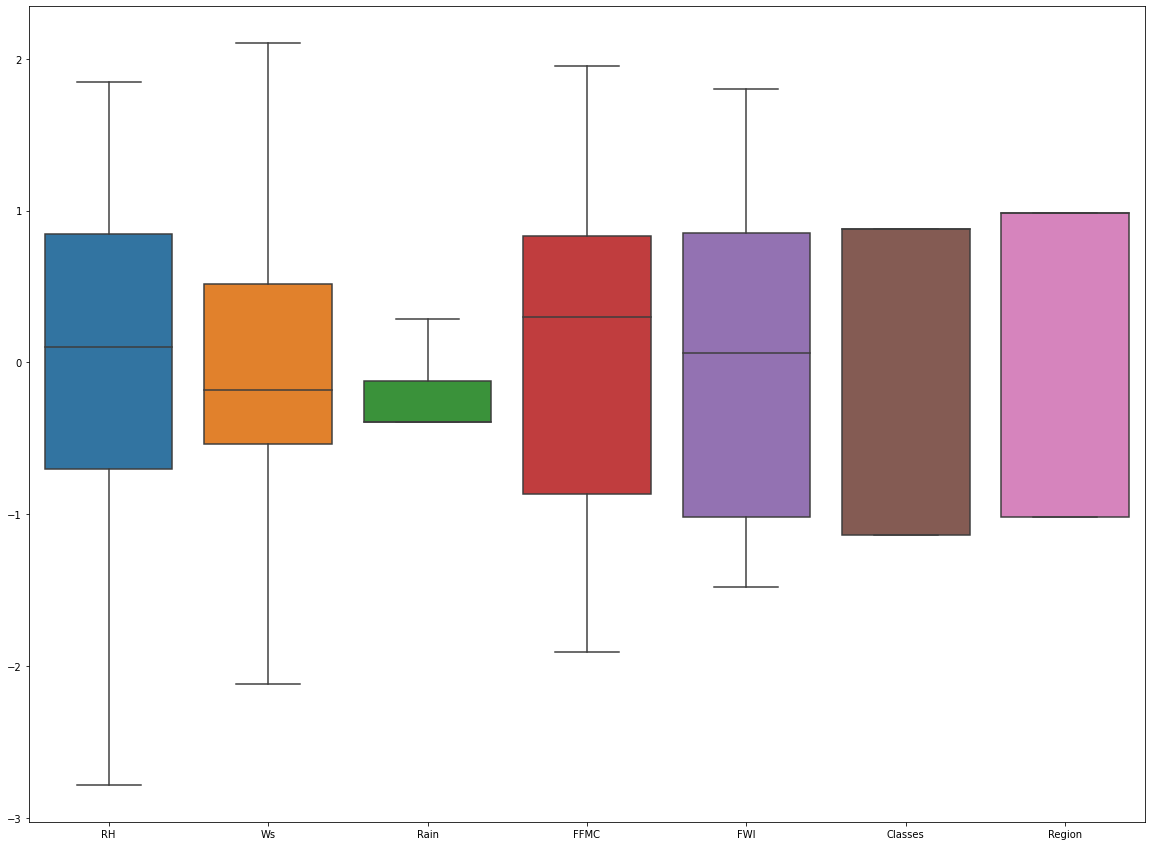

In [110]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data = df_xtrain_scaled, ax = ax)

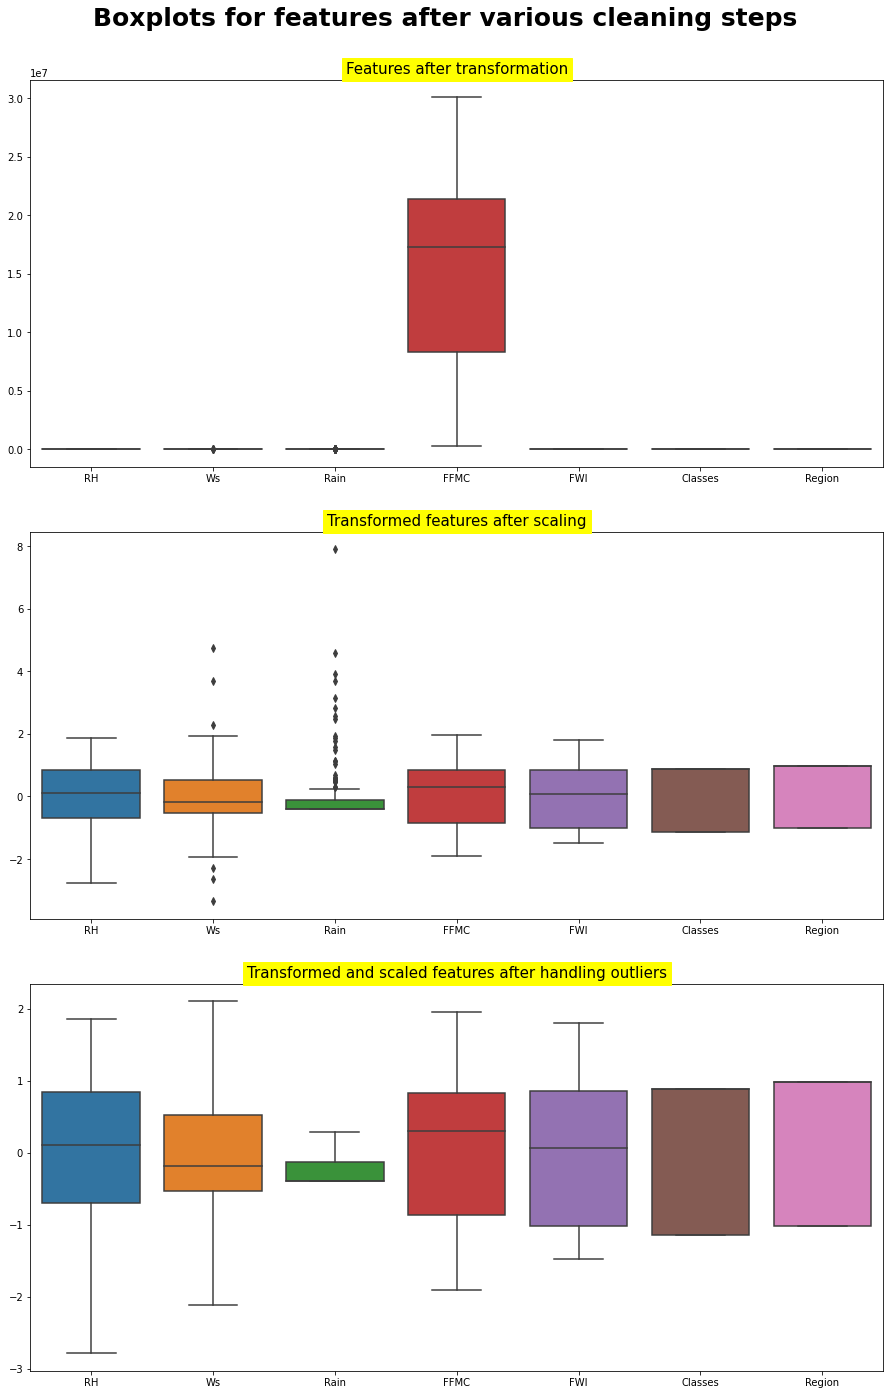

In [111]:
plt.figure(figsize=(13,20))
plt.suptitle("Boxplots for features after various cleaning steps", fontsize = 25, fontweight='bold')

plt.subplot(3,1,1)
sns.boxplot(data=x_train)
plt.title('Features after transformation', fontsize='15',backgroundcolor='yellow',color='black')
plt.subplot(3,1,2)
sns.boxplot(data=df_xtrain_scaled_toplot)
plt.title('Transformed features after scaling', fontsize='15',backgroundcolor='yellow',color='black')
plt.subplot(3,1,3)
sns.boxplot(data=df_xtrain_scaled)
plt.title('Transformed and scaled features after handling outliers', fontsize='15',backgroundcolor='yellow',color='black')
plt.tight_layout(pad=3)

We have observed that if we replace the outliers below the lower bound and above the upper bound by 25th and 75th quantile values respectively **(flooring and capping)**, the **testing score** comes out to be **negative**. So, it seems that the outliers are important in model building and prediction in this model.

#### Regplot

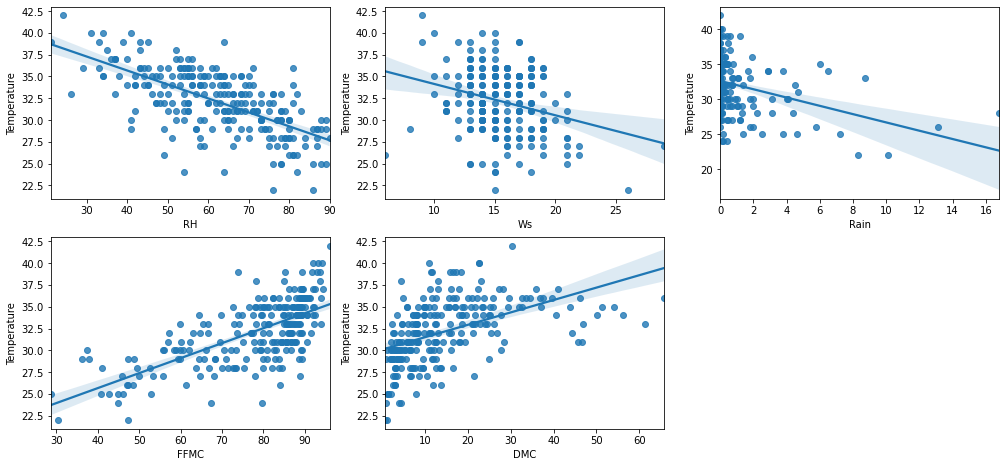

In [78]:
fig = plt.figure(figsize=(17,12))

for i in range(len(df_xtrain_scaled.columns)):
    if i<5:
        ax = plt.subplot(3,3,i+1)
        sns.regplot(x=df_xtrain_scaled.columns[i], y='Temperature', data=df)

In [113]:
y_test

200    37
112    31
128    35
179    33
49     33
       ..
125    30
215    28
195    35
197    35
86     31
Name: Temperature, Length: 61, dtype: int64

### Model training

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [112]:
# Create a dictionary of various regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic NET' : ElasticNet(),
    'Support Vector Regressor': SVR(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()}

In [54]:
len(y_train)

183

In [25]:
len(y_test)

61

In [26]:
x_test_scaled.shape

(61, 7)

In [113]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled, y_train)
    
    # making predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Training set performance
    
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
    model_train_score = model.score(x_train_scaled, y_train)
    model_train_r2 = r2_score(y_train, y_train_pred)
    model_train_adj_r2 = 1 - (1-model_train_score)*(len(y_train)-1)/(len(y_train)-df_xtrain_scaled.shape[1]-1)
    
    # Test set performance
    
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    model_test_score = model.score(x_test_scaled, y_test)
    model_test_r2 = r2_score(y_test, y_test_pred)
    model_test_adj_r2 = 1 - (1-model_test_score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)
    
    print(list(models.keys())[i])
    print("Model performance for training set")
    
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- MSE: {:.4f}".format(model_train_mse))
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- R2 score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2 score: {:.4f}".format(model_train_adj_r2))
    
    print("----------------------------------------------------")
    
    print("Model performance for test set")
    
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- MSE: {:.4f}".format(model_test_mse))
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- R2 score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2 score: {:.4f}".format(model_test_adj_r2))
    
    print("="*35)
    print('\n')

Linear Regression
Model performance for training set
- MAE: 1.9206
- MSE: 5.7083
- RMSE: 2.3892
- R2 score: 0.5418
- Adjusted R2 score: 0.5234
----------------------------------------------------
Model performance for test set
- MAE: 2.0092
- MSE: 5.9083
- RMSE: 2.4307
- R2 score: 0.6078
- Adjusted R2 score: 0.5560


Ridge Regression
Model performance for training set
- MAE: 1.9207
- MSE: 5.7084
- RMSE: 2.3892
- R2 score: 0.5418
- Adjusted R2 score: 0.5234
----------------------------------------------------
Model performance for test set
- MAE: 2.0097
- MSE: 5.9049
- RMSE: 2.4300
- R2 score: 0.6081
- Adjusted R2 score: 0.5563


Lasso Regression
Model performance for training set
- MAE: 2.1981
- MSE: 7.3668
- RMSE: 2.7142
- R2 score: 0.4086
- Adjusted R2 score: 0.3850
----------------------------------------------------
Model performance for test set
- MAE: 2.2912
- MSE: 8.1840
- RMSE: 2.8608
- R2 score: 0.4568
- Adjusted R2 score: 0.3850


Elastic NET
Model performance for training se

We observe that Random Forest Regressor has the highest adjusted R2 score for test dataset of 60.2% (random_state = 0). Second is K Neighbors Regressor with close to 59%.

#### Regularisation Techniques

In [114]:
# Lasso Regularization
from sklearn.linear_model import LassoCV, RidgeCV
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lassocv = LassoCV(cv =10, max_iter = 100000, normalize = True, verbose=1, n_jobs=-1)
lassocv.fit(x_train_scaled, y_train)

# best alpha parameter
alpha = lassocv.alpha_
alpha

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
.............

0.00241025443246158

In [115]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train_scaled, y_train)

lasso_reg.score(x_test_scaled, y_test)

0.608171766221865

In [116]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train_scaled, y_train)

ridgecv.alpha_

0.6059205624943143

In [117]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_scaled, y_train)

ridge_model.score(x_test_scaled, y_test)

0.6079797741227503

In [118]:
# Elastic net

#l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
elasticCV = ElasticNetCV(alphas = None, cv =10, n_jobs=-1)

elasticCV.fit(x_train_scaled, y_train)

elasticCV.alpha_

0.14049205468324383

In [119]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [120]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train_scaled, y_train)

elasticnet_reg.score(x_test_scaled, y_test)

0.6101330807573

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is least overfitting.

### Hyperparameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Tuning Random Forest Regressor model

In [122]:
param_grid = {"n_estimators":[5,10,20,30,50,60,70,90,110],
             "max_depth": range(2,20,1),            # maximum depth of the tree
             "min_samples_split": range(2,25,1),    # min no of samples required to split an internal node, to prevent tree from overfitting the training data
             "min_samples_leaf": range(1,10,1),     # min number of samples required to be at a leaf node
              "max_features": ['auto','sqrt','log2']
             }

rf_regressor = RandomForestRegressor()
rand_cv = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_jobs=-1, verbose=2, cv=20)
#rand_cv = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, n_jobs=-1, verbose=2, cv=10)
rand_cv.fit(x_train_scaled, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


RandomizedSearchCV(cv=20, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 25),
                                        'n_estimators': [5, 10, 20, 30, 50, 60,
                                                         70, 90, 110]},
                   verbose=2)

In [123]:
# best parameters
rand_cv.best_params_

{'n_estimators': 30,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12}

These are the best parameters out of the range we have provided. Now, we can train our model based on these parameters.

In [124]:
rf_best_model = rand_cv.best_estimator_
rf_best_model

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=12, n_estimators=30)

In [125]:
rf_best_model.score(x_train_scaled, y_train)

0.7823928451442393

In [126]:
rf_best_model.score(x_test_scaled, y_test)

0.5946809456861364

In [127]:
rf_best_pred = rf_best_model.predict(x_test_scaled)

In [128]:
mae = mean_absolute_error(y_test, rf_best_pred)
mse = mean_squared_error(y_test, rf_best_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_best_pred))
r2 = r2_score(y_test, rf_best_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print("R2 score:",r2)
print("Adjsuted R2 score:", adjusted_r2)

Mean Absolute Error: 1.9355745387312908
Mean Square Error: 6.106473040804943
Root Mean Square Error: 2.4711278883952854
R2 score: 0.5946809456861364
Adjsuted R2 score: 0.5411482403993997


Saving the model in a pickle format

In [130]:
import pickle
# saving the lasso regression model to the local file system having adj R2 = 0.6081
filename = 'algerian_forest_regression_model.pickle'
pickle.dump(lasso_reg, open(filename, 'wb'))

In [ ]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a